# Quick Start

This quick start tutorial will demonstrate the basic usage of DNAMite. For more detailed usage see the User Guide.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Regression

We'll start by importing some packages and reading in the California Housing dataset, a standard regression dataset. The task is to predict the median house value for a given district in California.

In [2]:
# Import california housing dataset
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
X, y = data["data"], data["target"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

To fit a DNAMite model to this data, we use `DNAMiteRegressor`. The only required input parameter is the number of features we'd like our model to have. We also input a device so that the model trains on GPU if a GPU is available. The model will fit a neural network for each feature as well as all pairwise interactions.

In [3]:
from dnamite.models import DNAMiteRegressor

model = DNAMiteRegressor(
    n_features=X_train.shape[1],
    device=device,
)
model.fit(X_train, y_train)

Discretizing features...


100%|██████████| 8/8 [00:00<00:00, 511.43it/s]

SPlIT 0


TRAINING MAINS


/home/mvanness/.venvs/dnamite/lib/python3.10/site-packages/dnamite/models/dnamite.py:862: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(os.pa

Early stopping at 46 epochs: Test loss has not improved for 5 consecutive epochs.
TRAINING PAIRS


Early stopping at 20 epochs: Test loss has not improved for 5 consecutive epochs.
SPlIT 1
TRAINING MAINS


/home/mvanness/.venvs/dnamite/lib/python3.10/site-packages/dnamite/models/dnamite.py:862: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(os.pa

Early stopping at 39 epochs: Test loss has not improved for 5 consecutive epochs.
TRAINING PAIRS


Early stopping at 24 epochs: Test loss has not improved for 5 consecutive epochs.
SPlIT 2
TRAINING MAINS


/home/mvanness/.venvs/dnamite/lib/python3.10/site-packages/dnamite/models/dnamite.py:862: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(os.pa

Early stopping at 26 epochs: Test loss has not improved for 5 consecutive epochs.
TRAINING PAIRS


Early stopping at 24 epochs: Test loss has not improved for 5 consecutive epochs.
SPlIT 3
TRAINING MAINS


/home/mvanness/.venvs/dnamite/lib/python3.10/site-packages/dnamite/models/dnamite.py:862: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(os.pa

Early stopping at 34 epochs: Test loss has not improved for 5 consecutive epochs.
TRAINING PAIRS


Early stopping at 25 epochs: Test loss has not improved for 5 consecutive epochs.
SPlIT 4
TRAINING MAINS


/home/mvanness/.venvs/dnamite/lib/python3.10/site-packages/dnamite/models/dnamite.py:862: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(os.pa

Early stopping at 20 epochs: Test loss has not improved for 5 consecutive epochs.
TRAINING PAIRS


Early stopping at 23 epochs: Test loss has not improved for 5 consecutive epochs.


Let's first check that our fitted model has reasonable predictive accuracy by comparing to a black-box ML model.

In [11]:
preds = model.predict(X_test)
print(f"DNAMite RMSE: {np.sqrt(np.mean((preds - y_test)**2))}")

# Compare to an sklearn model
from sklearn.ensemble import HistGradientBoostingRegressor
gbr = HistGradientBoostingRegressor()
gbr.fit(X_train, y_train)
preds = gbr.predict(X_test)
print(f"HistGBR RMSE: {np.sqrt(np.mean((preds - y_test)**2))}")

DNAMite RMSE: 0.49627299023616517
HistGBR RMSE: 0.4757083123134461


We can now start interpreting our model. First we can look at the top feature importances from the model.

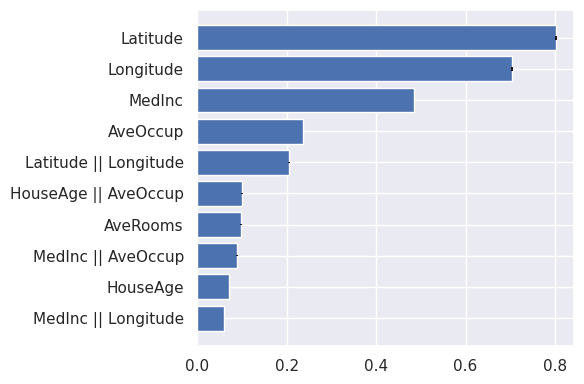

In [10]:
model.plot_feature_importances(n_features=10)

Latitude, longitude, and their interaction are all important terms in the model, which makes sense for predicting house prices in a state like California. The median income of the district is also reasonably an important predictor.

Now we can plot shape functions for some of the more important terms in the model. 

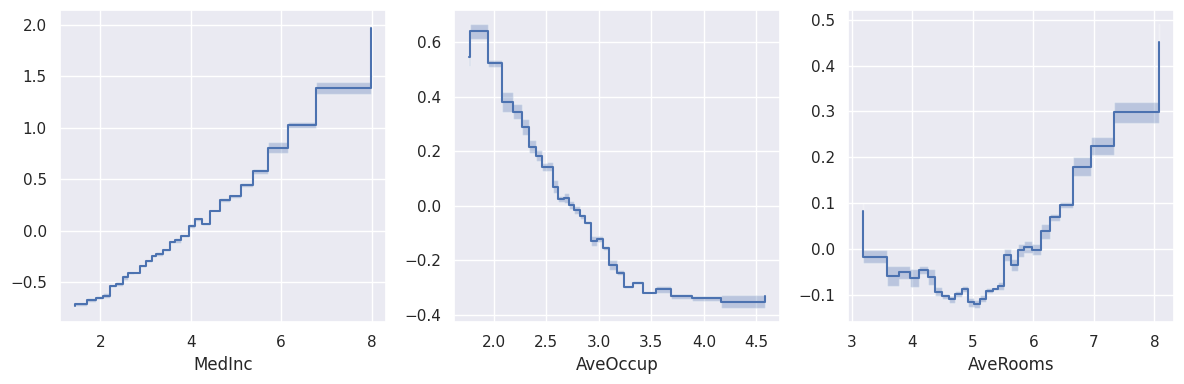

In [11]:
model.plot_shape_function(["MedInc", "AveOccup", "AveRooms"])

As expected, median income and average number of rooms are positively correlated with house price. Meanwhile, it's perhaps less expected that average number of occupants is negatively correlated with house price.

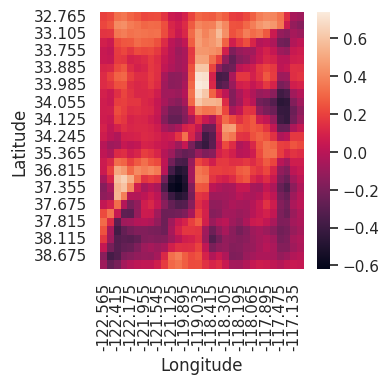

In [13]:
model.plot_pair_shape_function("Latitude", "Longitude")

The latitude/latitude interaction plot shows a few spots of lower and higher median house values. For example, the lightest spot around (34, -118.5) corresponds to Los Angeles. 

## Survival Analysis

DNAMite can be also be used for survival analysis. Briefly, survival analysis involves predicting the probability that a time-to-event variable $T$ happens before $t$ for all times $t > 0$. See the User Guide for more details on survival analysis. We'll use the flchain dataset from scikit-survival.

In [3]:
from sksurv.datasets import load_flchain
X, y = load_flchain()

# Change y dtypes and names
y.dtype = np.dtype([('event', bool), ('time', float)])

# # Impute chapter with new category
X["chapter"] = X["chapter"].astype("category")
X["chapter"] = X["chapter"].cat.add_categories("Unknown")
X["chapter"] = X["chapter"].fillna("Unknown")

# Clip Training data to avoid overflow errors
X["creatinine"] = X["creatinine"].clip(-5, 5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Fitting a DNAMite model for survival analysis is very similar to fitting a DNAMite regression model. Importantly, the `DNAMiteSurvival` model expects labels to be NumPy structured arrays with the dype `np.dtype([('event', bool), ('time', float)])`, where `event` is True only when the samples is not censored and `time` is the event/censor time.

In [4]:
from dnamite.models import DNAMiteSurvival

model = DNAMiteSurvival(
    n_features=X_train.shape[1],
    device=device,
)
model.fit(X_train, y_train)

Discretizing features...


100%|██████████| 9/9 [00:00<00:00, 127.52it/s]


SPlIT 0
TRAINING MAINS


Early stopping at 31 epochs: Test loss has not improved for 5 consecutive epochs.
TRAINING PAIRS


Early stopping at 7 epochs: Test loss has not improved for 5 consecutive epochs.
SPlIT 1
TRAINING MAINS


Early stopping at 33 epochs: Test loss has not improved for 5 consecutive epochs.
TRAINING PAIRS


Early stopping at 7 epochs: Test loss has not improved for 5 consecutive epochs.
SPlIT 2
TRAINING MAINS


Early stopping at 17 epochs: Test loss has not improved for 5 consecutive epochs.
TRAINING PAIRS


Early stopping at 6 epochs: Test loss has not improved for 5 consecutive epochs.
SPlIT 3
TRAINING MAINS


Early stopping at 52 epochs: Test loss has not improved for 5 consecutive epochs.
TRAINING PAIRS


Early stopping at 6 epochs: Test loss has not improved for 5 consecutive epochs.
SPlIT 4
TRAINING MAINS


Early stopping at 25 epochs: Test loss has not improved for 5 consecutive epochs.
TRAINING PAIRS


Early stopping at 6 epochs: Test loss has not improved for 5 consecutive epochs.


To evaluate the accuracy of the model, there are several metrics we could use. We recommend using the cumulative dynamic auc from scikit-survival.

In [9]:
from sksurv.metrics import cumulative_dynamic_auc

test_times = np.linspace(
    max(y_train["time"].min(), y_test[y_test["event"] > 0]["time"].min()) + 1e-4,
    min(y_train["time"].max(), y_test[y_test["event"] > 0]["time"].max()) - 1e-4,
    1000
)

surv_preds = model.predict_survival(X_test, test_times)
risk_preds = -1 * np.log(np.clip(surv_preds, 1e-5, 10 - 1e-5))
_, mean_auc = cumulative_dynamic_auc(y_train, y_test, risk_preds, test_times)
mean_auc

0.9484901497513646

As with the regression model, we can generate feature importances as well as shape functions from the model. Unique to survival analysis, these interpretations will be *time-dependent*, i.e. describing predictions of experiencing the event before time $t$ for specified time $t$.

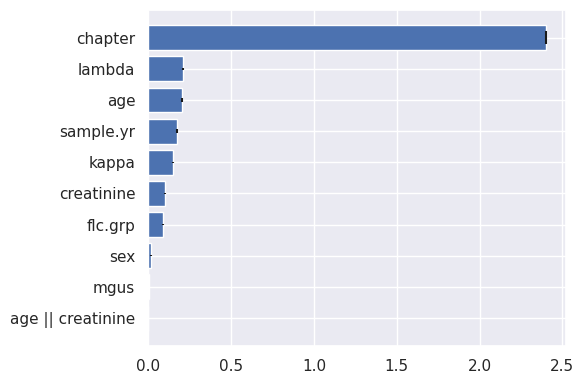

In [10]:
model.plot_feature_importances(eval_times=365*5)

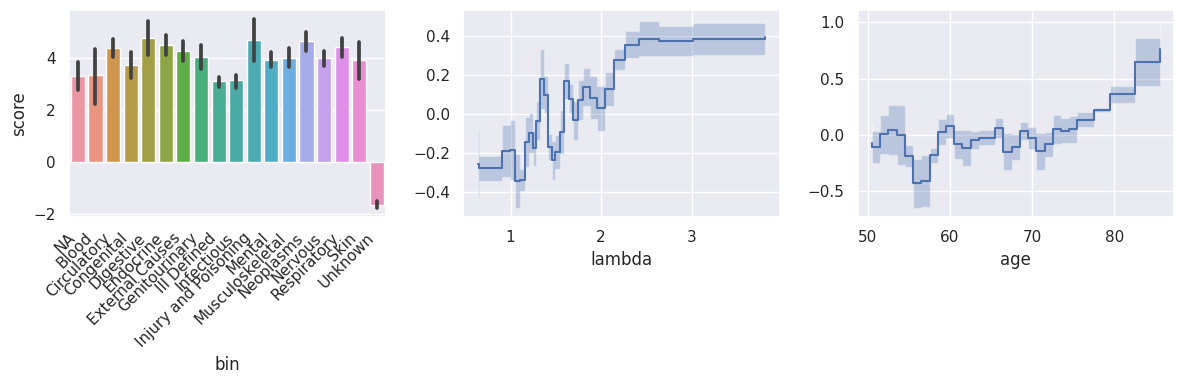

In [12]:
model.plot_shape_function(["chapter", "lambda", "age"], eval_times=365*5, is_cat_cols=[True, False, False])